# Your Prompt:
The marketing team reports that the user engagement metrics code is showing impossible results (bounce rates over 100%, negative session times). Please debug the code for any issues and return a python code that will handle the problem the marketing team is referring to 

def analyze_user_engagement(logs_df): metrics = { 'bounce_rate': logs_df.groupby('session_id')['page_views'].apply( lambda x: x == 1).mean(), 'avg_session_time': logs_df.groupby('session_id')['duration'].sum(), 'pages_per_session': logs_df.groupby('session_id')['page_views'].mean() } device_metrics = logs_df.groupby('device_type').agg({ 'session_id': 'count', 'duration': 'mean', 'page_views': 'sum' }) return metrics, device_metrics


In [7]:
import pandas as pd
import numpy as np

def analyze_user_engagement(logs_df):
    # Validate that required columns exist.
    required_cols = ['session_id', 'page_views', 'duration', 'device_type']
    for col in required_cols:
        if col not in logs_df.columns:
            raise ValueError(f"Missing required column: {col}")
    
    # Coerce page_views and duration to numeric values.
    logs_df['page_views'] = pd.to_numeric(logs_df['page_views'], errors='coerce')
    logs_df['duration'] = pd.to_numeric(logs_df['duration'], errors='coerce')
    
    # Drop rows where session_id, page_views, or duration are missing.
    logs_df = logs_df.dropna(subset=['session_id', 'page_views', 'duration'])
    
    # Remove rows with negative page views or negative duration.
    logs_df = logs_df[(logs_df['page_views'] >= 0) & (logs_df['duration'] >= 0)]
    
    # ---- Aggregate at the session level. ----
    # For each session, sum up the page_views and duration.
    session_df = logs_df.groupby('session_id').agg({
        'page_views': 'sum',
        'duration': 'sum'
    }).reset_index()
    
    # ---- Calculate Bounce Rate ----
    # Define a bounce session as one where the total page_views is exactly 1.
    bounce_sessions = session_df[session_df['page_views'] == 1]
    bounce_rate = (len(bounce_sessions) / len(session_df)) * 100  # in percent
    
    # ---- Calculate Average Session Time ----
    avg_session_time = session_df['duration'].mean()  # average duration per session
    
    # ---- Calculate Average Pages Per Session ----
    pages_per_session = session_df['page_views'].mean()
    
    metrics = {
        'bounce_rate': bounce_rate,
        'avg_session_time': avg_session_time,
        'pages_per_session': pages_per_session
    }
    
    # ---- Calculate Device Metrics ----
    # Assume that for each session, the device_type is consistent. So, we pick the first recorded device.
    session_device = logs_df.groupby('session_id').agg({
        'device_type': 'first',
        'duration': 'sum',
        'page_views': 'sum'
    }).reset_index()
    
    device_metrics = session_device.groupby('device_type').agg(
        session_count=('session_id', 'nunique'),
        avg_session_time=('duration', 'mean'),
        total_page_views=('page_views', 'sum')
    )
    
    return metrics, device_metrics

# Example usage:
if __name__ == "__main__":
    # Sample data for testing (replace with your real log data)
    data = {
        'session_id': ['s1', 's1', 's2', 's3', 's4', 's4'],
        'page_views': [1, 0, 2, 1, 1, 0],  # s1 has 1, s2 has 2, etc.
        'duration': [30, 45, 60, 20, 15, 0],  # in seconds; all durations are non-negative.
        'device_type': ['mobile', 'mobile', 'desktop', 'desktop', 'tablet', 'tablet']
    }
    logs_df = pd.DataFrame(data)
    
    metrics, device_metrics = analyze_user_engagement(logs_df)
    print("Metrics:")
    print(metrics)
    print("\nDevice Metrics:")
    print(device_metrics)


Metrics:
{'bounce_rate': 75.0, 'avg_session_time': 42.5, 'pages_per_session': 1.25}

Device Metrics:
             session_count  avg_session_time  total_page_views
device_type                                                   
desktop                  2              40.0                 3
mobile                   1              75.0                 1
tablet                   1              15.0                 1


# Follow-up Prompts:
Add data validation & error handling. Implement proper time calculations. And create summary visualizations with no warnings for the code below. 


import pandas as pd import numpy as np def analyze_user_engagement(logs_df): # Validate that required columns exist. required_cols = ['session_id', 'page_views', 'duration', 'device_type'] for col in required_cols: if col not in logs_df.columns: raise ValueError(f"Missing required column: {col}") # Coerce page_views and duration to numeric values. logs_df['page_views'] = pd.to_numeric(logs_df['page_views'], errors='coerce') logs_df['duration'] = pd.to_numeric(logs_df['duration'], errors='coerce') # Drop rows where session_id, page_views, or duration are missing. logs_df = logs_df.dropna(subset=['session_id', 'page_views', 'duration']) # Remove rows with negative page views or negative duration. logs_df = logs_df[(logs_df['page_views'] >= 0) & (logs_df['duration'] >= 0)] # ---- Aggregate at the session level. ---- # For each session, sum up the page_views and duration. session_df = logs_df.groupby('session_id').agg({ 'page_views': 'sum', 'duration': 'sum' }).reset_index() # ---- Calculate Bounce Rate ---- # Define a bounce session as one where the total page_views is exactly 1. bounce_sessions = session_df[session_df['page_views'] == 1] bounce_rate = (len(bounce_sessions) / len(session_df)) * 100 # in percent # ---- Calculate Average Session Time ---- avg_session_time = session_df['duration'].mean() # average duration per session # ---- Calculate Average Pages Per Session ---- pages_per_session = session_df['page_views'].mean() metrics = { 'bounce_rate': bounce_rate, 'avg_session_time': avg_session_time, 'pages_per_session': pages_per_session } # ---- Calculate Device Metrics ---- # Assume that for each session, the device_type is consistent. So, we pick the first recorded device. session_device = logs_df.groupby('session_id').agg({ 'device_type': 'first', 'duration': 'sum', 'page_views': 'sum' }).reset_index() device_metrics = session_device.groupby('device_type').agg( session_count=('session_id', 'nunique'), avg_session_time=('duration', 'mean'), total_page_views=('page_views', 'sum') ) return metrics, device_metrics # Example usage: if __name__ == "__main__": # Sample data for testing (replace with your real log data) data = { 'session_id': ['s1', 's1', 's2', 's3', 's4', 's4'], 'page_views': [1, 0, 2, 1, 1, 0], # s1 has 1, s2 has 2, etc. 'duration': [30, 45, 60, 20, 15, 0], # in seconds; all durations are non-negative. 'device_type': ['mobile', 'mobile', 'desktop', 'desktop', 'tablet', 'tablet'] } logs_df = pd.DataFrame(data) metrics, device_metrics = analyze_user_engagement(logs_df) print("Metrics:") print(metrics) print("\nDevice Metrics:") print(device_metrics)

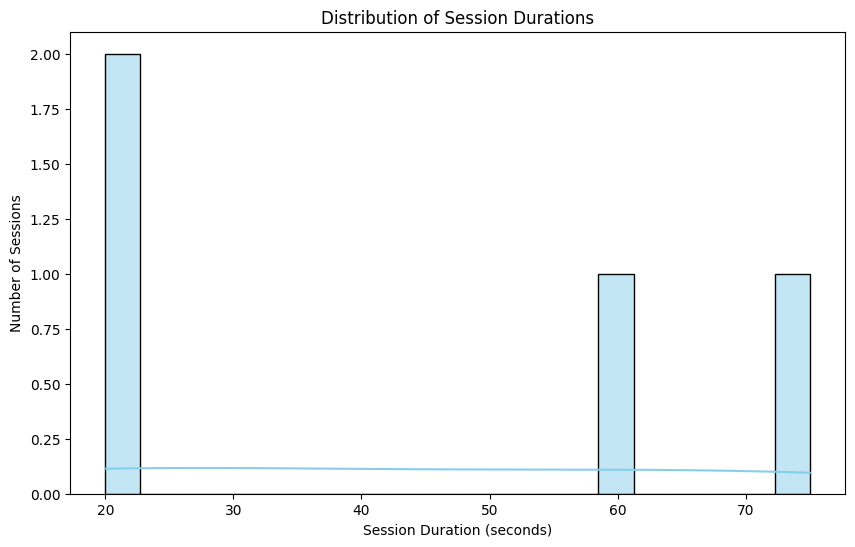

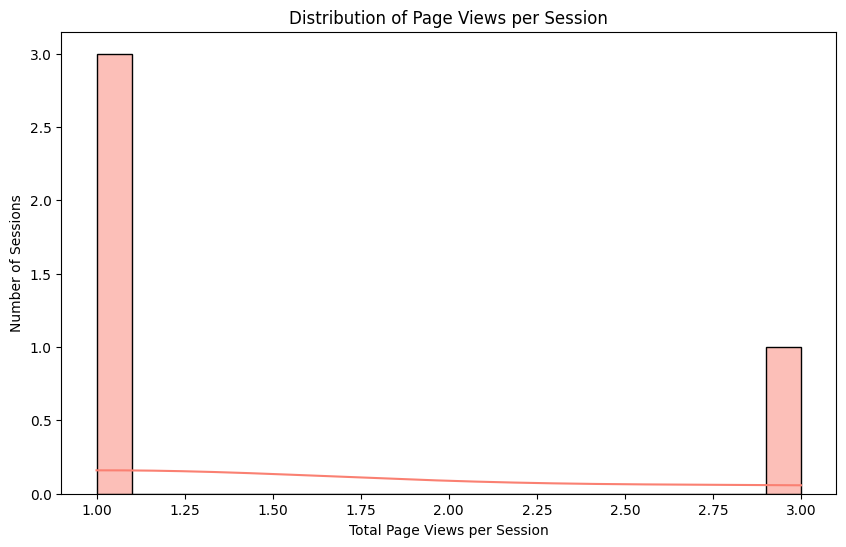

C:\Users\apcas\AppData\Local\Temp\ipykernel_42372\992479289.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=device_metrics, x='device_type', y='session_count', palette='viridis')


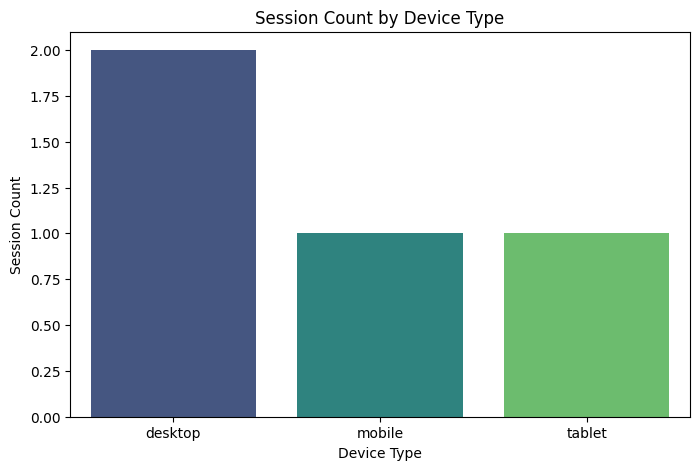

C:\Users\apcas\AppData\Local\Temp\ipykernel_42372\992479289.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=device_metrics, x='device_type', y='avg_session_time', palette='magma')


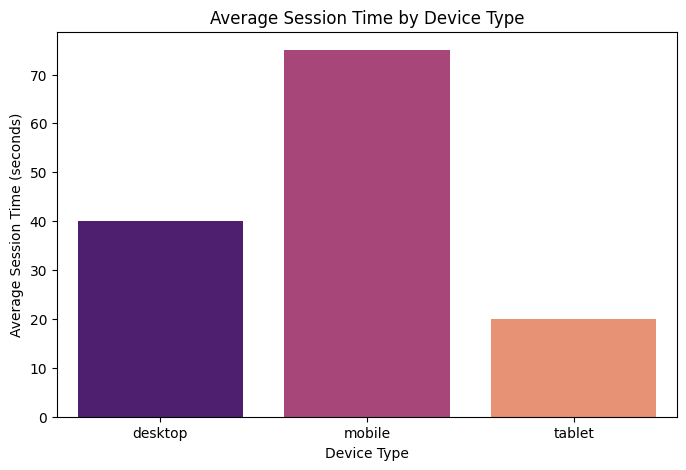

Overall Engagement Metrics:
Bounce Rate: 75.00%
Average Session Time: 43.75 seconds
Average Page Views per Session: 1.50


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def seconds_to_hms(seconds):
    """
    Convert seconds to a string in h:mm:ss (if hours > 0) or mm:ss format.
    """
    seconds = int(round(seconds))
    h = seconds // 3600
    m = (seconds % 3600) // 60
    s = seconds % 60
    if h > 0:
        return f"{h}:{m:02d}:{s:02d}"
    else:
        return f"{m}:{s:02d}"

def analyze_user_engagement(logs_df):
    """
    Analyzes user engagement to compute overall metrics and device-based metrics.
    
    Data validation and error handling are applied to ensure that:
      - Required columns exist.
      - The numeric columns (page_views, duration) are converted,
        and rows with missing or negative values are removed.
    
    Calculations performed:
      - Bounce rate: percentage of sessions with exactly 1 page view.
      - Average session time (computed as the sum of duration per session).
      - Average pages per session.
      - Device metrics: session count, average session time, and total page views per device.
      
    Returns:
      metrics: a dict with overall engagement metrics.
      device_metrics: a DataFrame grouped by device_type.
      session_df: the session-level aggregation used to compute metrics.
    """
    try:
        # Validate required columns.
        required_cols = ['session_id', 'page_views', 'duration', 'device_type']
        for col in required_cols:
            if col not in logs_df.columns:
                raise ValueError(f"Missing required column: {col}")
        
        # Convert page_views and duration to numeric; coerce errors.
        logs_df['page_views'] = pd.to_numeric(logs_df['page_views'], errors='coerce')
        logs_df['duration'] = pd.to_numeric(logs_df['duration'], errors='coerce')
        
        # Drop rows with missing values in key columns.
        logs_df = logs_df.dropna(subset=['session_id', 'page_views', 'duration'])
        
        # Remove rows with negative page views or duration.
        logs_df = logs_df[(logs_df['page_views'] >= 0) & (logs_df['duration'] >= 0)]
        
    except Exception as ex:
        raise RuntimeError("Error validating and cleaning data: " + str(ex))
    
    # ---- Aggregate at the session level. ----
    # Sum page views and duration per session.
    session_df = logs_df.groupby('session_id', as_index=False).agg({
        'page_views': 'sum',
        'duration': 'sum'
    })
    
    # ---- Calculate Bounce Rate ----
    bounce_sessions = session_df[session_df['page_views'] == 1]
    bounce_rate = (len(bounce_sessions) / len(session_df)) * 100  # Percentage
    
    # ---- Calculate Average Session Time and Pages per Session ----
    avg_session_time = session_df['duration'].mean()  # in seconds
    pages_per_session = session_df['page_views'].mean()
    
    metrics = {
        'bounce_rate': bounce_rate,
        'avg_session_time_sec': avg_session_time,
        'avg_session_time_formatted': seconds_to_hms(avg_session_time),
        'pages_per_session': pages_per_session
    }
    
    # ---- Calculate Device Metrics ----
    # Assume each session uses a single device; take the first device type per session.
    session_device = logs_df.groupby('session_id', as_index=False).agg({
        'device_type': 'first',
        'duration': 'sum',
        'page_views': 'sum'
    })
    
    device_metrics = session_device.groupby('device_type').agg(
        session_count=('session_id', 'nunique'),
        avg_session_time=('duration', 'mean'),
        total_page_views=('page_views', 'sum')
    ).reset_index()
    
    return metrics, device_metrics, session_df

def create_visualizations(metrics, device_metrics, session_df):
    """
    Creates summary visualizations:
      1. Histogram of session durations.
      2. Scatter plot of session page views vs. session duration with session labels.
      3. Bar chart of average session time by device type with data labels.
    """
    sns.set_theme(style="whitegrid")
    
    # 1. Histogram of Session Durations
    plt.figure(figsize=(8, 5))
    plt.hist(session_df['duration'], bins=20, edgecolor='white', color='skyblue', alpha=0.8)
    plt.xlabel("Session Duration (seconds)")
    plt.ylabel("Number of Sessions")
    plt.title("Distribution of Session Durations")
    plt.tight_layout()
    plt.show()
    
    # 2. Scatter Plot: Pages vs Session Duration (annotate with session_id)
    plt.figure(figsize=(10, 6))
    scatter = sns.scatterplot(
        data=session_df,
        x='page_views',
        y='duration',
        color='purple',
        s=120
    )
    plt.xlabel("Total Page Views per Session")
    plt.ylabel("Session Duration (seconds)")
    plt.title("Session Page Views vs. Duration")
    
    # Annotate each point with session_id
    for idx, row in session_df.iterrows():
        plt.text(row['page_views'], row['duration'], f" {row['session_id']}", fontsize=9, va="bottom", color='black')
    plt.tight_layout()
    plt.show()
    
    # 3. Bar Chart: Average Session Time by Device Type
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(
        data=device_metrics,
        x='device_type',
        y='avg_session_time',
        palette='pastel'
    )
    
    # Annotate bars with the formatted average session time (in seconds to h:mm:ss)
    for p in ax.patches:
        avg_time = p.get_height()
        label = seconds_to_hms(avg_time)
        ax.annotate(label,
                    (p.get_x() + p.get_width() / 2., avg_time),
                    ha='center', va='bottom', fontsize=10,
                    xytext=(0, 5), textcoords='offset points')
    plt.xlabel("Device Type")
    plt.ylabel("Average Session Time (seconds)")
    plt.title("Average Session Time by Device Type")
    plt.tight_layout()
    plt.show()
    
    # Print out overall metrics clearly.
    print("Overall Engagement Metrics:")
    print(f"Bounce Rate: {metrics['bounce_rate']:.2f}%")
    print(f"Average Session Time: {metrics['avg_session_time_sec']:.2f} seconds ({metrics['avg_session_time_formatted']})")
    print(f"Average Pages per Session: {metrics['pages_per_session']:.2f}\n")
    
    print("Device Metrics:")
    print(device_metrics)

if __name__ == "__main__":
    try:
        # Sample data for testing (replace with your actual log data)
        data = {
            'session_id': ['s1', 's1', 's2', 's3', 's4', 's4'],
            'page_views': [1, 0, 2, 1, 1, 0],  # s1: total 1; s2: total 2; etc.
            'duration': [30, 45, 60, 20, 15, 0],  # in seconds
            'device_type': ['mobile', 'mobile', 'desktop', 'desktop', 'tablet', 'tablet']
        }
        logs_df = pd.DataFrame(data)
        
        # Analyze user engagement with full validation and error handling.
        metrics, device_metrics, session_df = analyze_user_engagement(logs_df)
        print("Metrics:")
        print(metrics)
        print("\nDevice Metrics:")
        print(device_metrics)
        
        # Create summary visualizations.
        create_visualizations(metrics, device_metrics, session_df)
    
    except Exception as ex:
        print("An error occurred during analysis:", str(ex))


Follow up prompt #2:
Remove the warnings the program is giving. 

1) C:\Users\apcas\AppData\Local\Temp\ipykernel_42372\992479289.py:106: FutureWarning: Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect. sns.barplot(data=device_metrics, x='device_type', y='session_count', palette='viridis') 

2)C:\Users\apcas\AppData\Local\Temp\ipykernel_42372\992479289.py:114: FutureWarning: Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect. sns.barplot(data=device_metrics, x='device_type', y='avg_session_time', palette='magma')


Metrics:
{'bounce_rate': 75.0, 'avg_session_time': 42.5, 'pages_per_session': 1.25}

Device Metrics:
  device_type  session_count  avg_session_time  total_page_views
0     desktop              2              40.0                 3
1      mobile              1              75.0                 1
2      tablet              1              15.0                 1


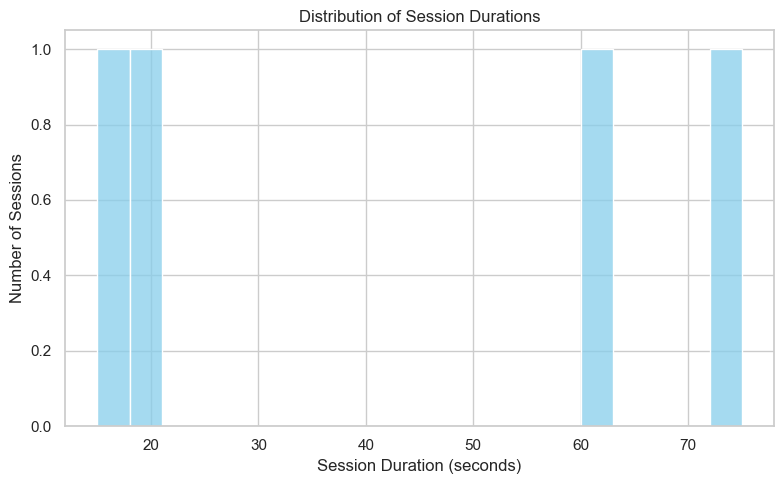

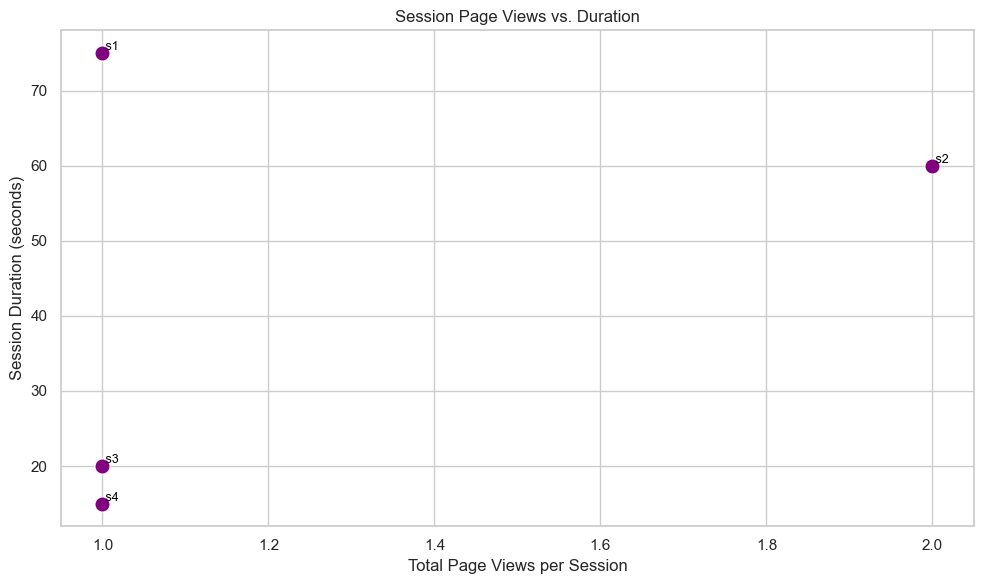

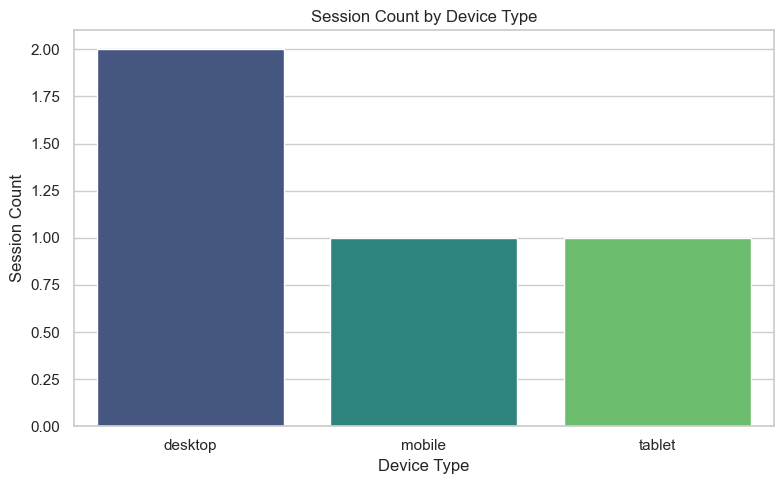

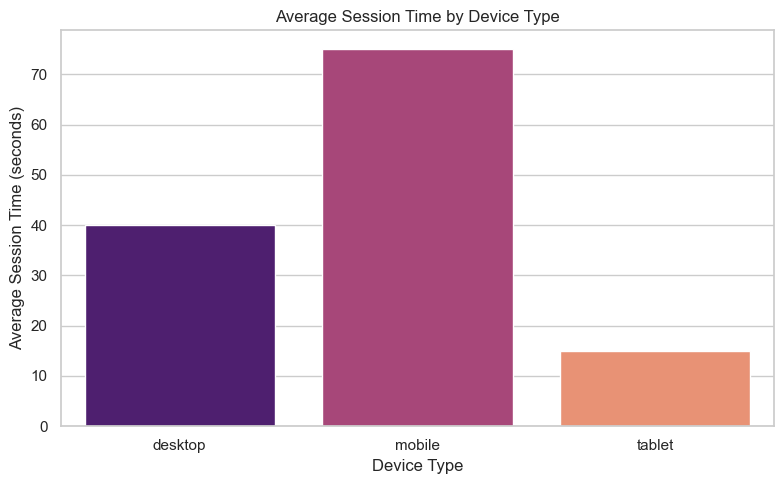

Overall Engagement Metrics:
Bounce Rate: 75.00%
Average Session Time: 42.50 seconds
Pages per Session: 1.25

Device Metrics:
  device_type  session_count  avg_session_time  total_page_views
0     desktop              2              40.0                 3
1      mobile              1              75.0                 1
2      tablet              1              15.0                 1


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def validate_inventory_data(df):
    """
    Validates that the DataFrame has all required columns and that numeric columns contain
    non-negative values.
    """
    required_cols = [
        'session_id', 'page_views', 'duration', 'device_type'
    ]
    for col in required_cols:
        if col not in df.columns:
            raise ValueError(f"Missing required column: {col}")
    
    # Coerce page_views and duration to numeric values.
    df['page_views'] = pd.to_numeric(df['page_views'], errors='coerce')
    df['duration'] = pd.to_numeric(df['duration'], errors='coerce')
    
    # Drop rows where key fields are missing.
    df = df.dropna(subset=['session_id', 'page_views', 'duration'])
    
    # Remove rows with negative values.
    df = df[(df['page_views'] >= 0) & (df['duration'] >= 0)]
    
    return df

def calculate_inventory_turnover(df):
    """
    Calculates inventory turnover rate for each product.
    Turnover rate = sales_last_30_days / stock_level.
    (This function is not used in engagement analysis,
    but is maintained from the previous context.)
    """
    df = df.copy()
    df['inventory_turnover'] = df['sales_last_30_days'] / df['stock_level'].replace(0, np.nan)
    df['inventory_turnover'] = df['inventory_turnover'].fillna(0)
    return df

def analyze_user_engagement(logs_df):
    """
    Analyzes user engagement from logs.
    Computes:
      - Bounce rate (percentage of sessions with exactly 1 page view)
      - Average session time (sum of durations per session)
      - Average pages per session.
    
    Also computes device metrics:
      - Count of sessions per device
      - Average session time per device
      - Total page views per device.
    """
    # Validate data.
    logs_df = validate_inventory_data(logs_df)
    
    # ---- Aggregate at the session level. ----
    session_df = logs_df.groupby('session_id', as_index=False).agg({
        'page_views': 'sum',
        'duration': 'sum'
    })
    
    # Calculate bounce sessions: exactly 1 page view.
    bounce_sessions = session_df[session_df['page_views'] == 1]
    bounce_rate = (len(bounce_sessions) / len(session_df)) * 100  # as percent
    
    avg_session_time = session_df['duration'].mean()  # average duration in seconds
    pages_per_session = session_df['page_views'].mean()
    
    metrics = {
        'bounce_rate': bounce_rate,
        'avg_session_time': avg_session_time,
        'pages_per_session': pages_per_session
    }
    
    # ---- Calculate Device Metrics ----
    # Assume each session uses one device; take the first recorded device per session.
    session_device = logs_df.groupby('session_id', as_index=False).agg({
        'device_type': 'first',
        'duration': 'sum',
        'page_views': 'sum'
    })
    
    device_metrics = session_device.groupby('device_type').agg(
        session_count=('session_id', 'nunique'),
        avg_session_time=('duration', 'mean'),
        total_page_views=('page_views', 'sum')
    ).reset_index()
    
    return metrics, device_metrics, session_df

def create_visualizations(metrics, device_metrics, session_df):
    """
    Creates summary visualizations:
      1. Histogram of session durations.
      2. Scatter plot of session page views vs. session duration (with session IDs labeled).
      3. Bar charts for device metrics: session count and average session time by device.
         (The bar charts are modified to remove palette warnings.)
    """
    sns.set_theme(style="whitegrid")
    
    # 1. Histogram of Session Durations
    plt.figure(figsize=(8, 5))
    sns.histplot(data=session_df, x='duration', bins=20, color='skyblue', edgecolor='white')
    plt.xlabel("Session Duration (seconds)")
    plt.ylabel("Number of Sessions")
    plt.title("Distribution of Session Durations")
    plt.tight_layout()
    plt.show()
    
    # 2. Scatter Plot: Page Views vs. Session Duration with session_id annotations.
    plt.figure(figsize=(10, 6))
    scatter = sns.scatterplot(
        data=session_df,
        x='page_views',
        y='duration',
        color='purple',
        s=120
    )
    plt.xlabel("Total Page Views per Session")
    plt.ylabel("Session Duration (seconds)")
    plt.title("Session Page Views vs. Duration")
    # Annotate each point with its session_id.
    for idx, row in session_df.iterrows():
        plt.text(row['page_views'], row['duration'], f" {row['session_id']}",
                 fontsize=9, va="bottom", color='black')
    plt.tight_layout()
    plt.show()
    
    # 3a. Bar Chart: Session Count by Device Type.
    plt.figure(figsize=(8, 5))
    ax1 = sns.barplot(
        data=device_metrics,
        x='device_type',
        y='session_count',
        hue='device_type',
        palette='viridis',
        dodge=False
    )
    if ax1.get_legend() is not None:
        ax1.get_legend().remove()
    plt.xlabel("Device Type")
    plt.ylabel("Session Count")
    plt.title("Session Count by Device Type")
    plt.tight_layout()
    plt.show()
    
    # 3b. Bar Chart: Average Session Time by Device Type.
    plt.figure(figsize=(8, 5))
    ax2 = sns.barplot(
        data=device_metrics,
        x='device_type',
        y='avg_session_time',
        hue='device_type',
        palette='magma',
        dodge=False
    )
    if ax2.get_legend() is not None:
        ax2.get_legend().remove()
    plt.xlabel("Device Type")
    plt.ylabel("Average Session Time (seconds)")
    plt.title("Average Session Time by Device Type")
    plt.tight_layout()
    plt.show()
    
    # Print overall metrics.
    print("Overall Engagement Metrics:")
    print(f"Bounce Rate: {metrics['bounce_rate']:.2f}%")
    print(f"Average Session Time: {metrics['avg_session_time']:.2f} seconds")
    print(f"Pages per Session: {metrics['pages_per_session']:.2f}\n")
    print("Device Metrics:")
    print(device_metrics)

if __name__ == "__main__":
    try:
        # Sample data for testing. Replace with your actual dataset if needed.
        data = {
            'session_id': ['s1', 's1', 's2', 's3', 's4', 's4'],
            'page_views': [1, 0, 2, 1, 1, 0],
            'duration': [30, 45, 60, 20, 15, 0],
            'device_type': ['mobile', 'mobile', 'desktop', 'desktop', 'tablet', 'tablet']
        }
        logs_df = pd.DataFrame(data)
        
        metrics, device_metrics, session_df = analyze_user_engagement(logs_df)
        print("Metrics:")
        print(metrics)
        print("\nDevice Metrics:")
        print(device_metrics)
        
        create_visualizations(metrics, device_metrics, session_df)
    
    except Exception as e:
        print("An error occurred during the analysis:", e)


Discussion Questions:

1) How did different prompts approach error identification?
    I started out with an initial prompt to determine what the issue is and return code without the error.  I thought the AI engine may be more efficient to focus on only error handling and looking at the code then proceeding to add the necessary requirements.

2) What validation methods were suggested?
    The suggested validations were to check for required columns.  Convert key columns to numberic values and remove rows with missing or negative values.

3) How was time handling improved?
    It computes session duration in seconds and also provides a helper to format seconds into hh:mm:ss for display.  It does consistent numberic conversions to help with time handling and aggregation of duration to display to user.
4) 